<a href="https://colab.research.google.com/github/Alisyed098/Capstone-Project---4-Online-Retail-Customer-Segmentation/blob/main/Capstone_Project_4_Online_Retail_Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - **Online Retail Customer Segmentation**



##### **Project Type**    - Unsupervised
##### **Contribution**    - Individual
##### **Team Member 1 -** Syed Junaid Ali


# **Project Summary -**


This is an Unsupervised Learning project.I will have to build a model which is capable of segment retail customers on the basis of there Recency, Monetary and Frequency(RFM).



# **GitHub Link -**

https://github.com/Alisyed098/Capstone-Project---4-Online-Retail-Customer-Segmentation

# **Problem Statement**


In this project, your task is to identify major customer segments on a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

### Import Libraries

In [80]:
# Import Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [81]:
import datetime
import scipy
import scipy.stats as stat
import math
import sklearn

In [82]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
import plotly.express as px
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

## Libraries for Hierarchical clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

### Dataset Loading

In [83]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [84]:
dframe = pd.read_excel('/content/drive/MyDrive/Online Retail.xlsx')

### Dataset First View

In [85]:
# Dataset First Look
dframe.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [86]:
dframe.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


### Dataset Rows & Columns count

In [87]:
# Dataset Rows & Columns count
dframe.shape

(541909, 8)

### Dataset Information

In [88]:
# Dataset Info
dframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


#### Duplicate Values

In [89]:
# Dataset Duplicate Value Count
len(dframe[dframe.duplicated(keep = False)])

10147

#### Missing Values/Null Values

In [90]:
# Missing Values/Null Values Count
dframe.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [91]:
dframe['Country'].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Bahrain', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

# Dataset Information

- InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
- StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
- Description: Product (item) name. Nominal.
- Quantity: The quantities of each product (item) per transaction. Numeric.
- InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.
- UnitPrice: Unit price. Numeric, Product price per unit in sterling.
- CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
- Country: Country name. Nominal, the name of the country where each customer resides.


# **Exploratory Data Analysis**

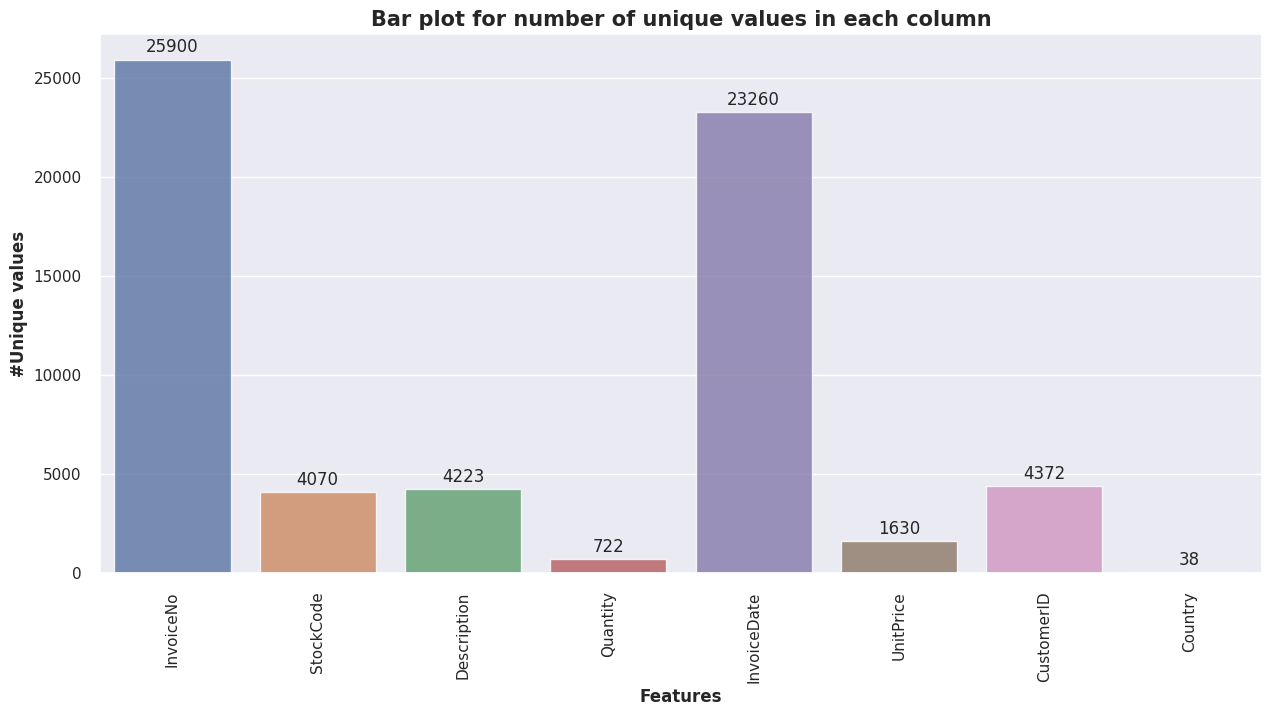

In [92]:
unique_df=pd.DataFrame()
unique_df['Features']=dframe.columns
unique=[]
for i in dframe.columns:
  unique.append(dframe[i].nunique())
unique_df['Uniques']=unique

f, ax = plt.subplots(1,1, figsize=(15,7))

splot = sns.barplot(x=unique_df['Features'], y=unique_df['Uniques'], alpha=0.8)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2, p.get_height()), ha = 'center',
                   va = 'center', xytext = (0, 9), textcoords = 'offset points')
plt.title('Bar plot for number of unique values in each column',weight='bold', size=15)
plt.ylabel('#Unique values', size=12, weight='bold')
plt.xlabel('Features', size=12, weight='bold')
plt.xticks(rotation=90)
plt.show()

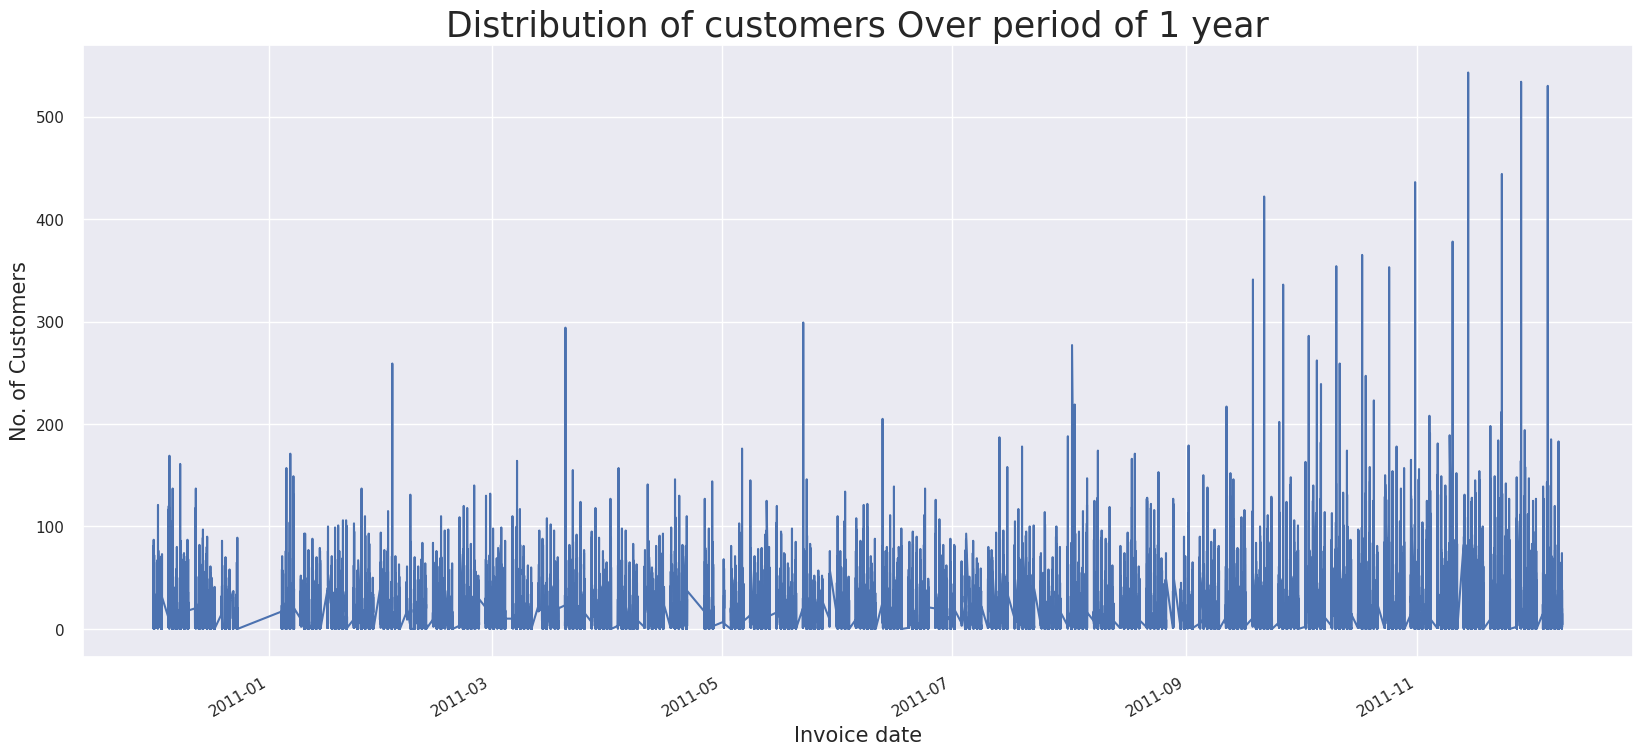

In [93]:
# distribution customer in 1 year period of time
plt.figure(figsize=(20,9))
customer_distribution = dframe.groupby('InvoiceDate').count()['CustomerID'].plot()

## Set title and x, y labels
plt.title('Distribution of customers Over period of 1 year', size=25)
plt.xlabel('Invoice date', size=15)
plt.ylabel('No. of Customers', size=15)
plt.show()

**Dropping Duplicates**

In [94]:
# copying dataset
df = dframe.copy()

Before proceeding further dupicates values needs to be removed.

In [95]:
# dropping all duplicate values
df.drop_duplicates(keep = "first", inplace = True)

In [96]:
print(f"Shape of the dataset before removing duplicates{dframe.shape}")

print(f"Shape of the dataset after removing duplicates{df.shape}")

Shape of the dataset before removing duplicates(541909, 8)
Shape of the dataset after removing duplicates(536641, 8)


**Country count on the basis of Invoce no.**

In [97]:
## Apply groupby function on country and Invoice No.
country_count = df.groupby('Country')['InvoiceNo'].count().reset_index()


In [98]:
country_count.head()

,Country,InvoiceNo
0,Australia,1258
1,Austria,401
2,Bahrain,19
3,Belgium,2069
4,Brazil,32


In [99]:
## From country_count variable finding top 10 countries
Top_ten_countries = country_count.sort_values('InvoiceNo', ascending=False, ignore_index=True).head(10)
Top_ten_countries

,Country,InvoiceNo
0,United Kingdom,490300
1,Germany,9480
2,France,8541
3,EIRE,8184
4,Spain,2528
5,Netherlands,2371
6,Belgium,2069
7,Switzerland,1994
8,Portugal,1510
9,Australia,1258


In [100]:
## Adding country percentage column to top 10 countries data frame
Top_ten_countries['Country_percent']= Top_ten_countries['InvoiceNo']*100/df['InvoiceNo'].count()

In [101]:
Top_ten_countries

,Country,InvoiceNo,Country_percent
0,United Kingdom,490300,91.364618
1,Germany,9480,1.766544
2,France,8541,1.591567
3,EIRE,8184,1.525042
4,Spain,2528,0.471078
5,Netherlands,2371,0.441822
6,Belgium,2069,0.385546
7,Switzerland,1994,0.371571
8,Portugal,1510,0.281380
9,Australia,1258,0.234421


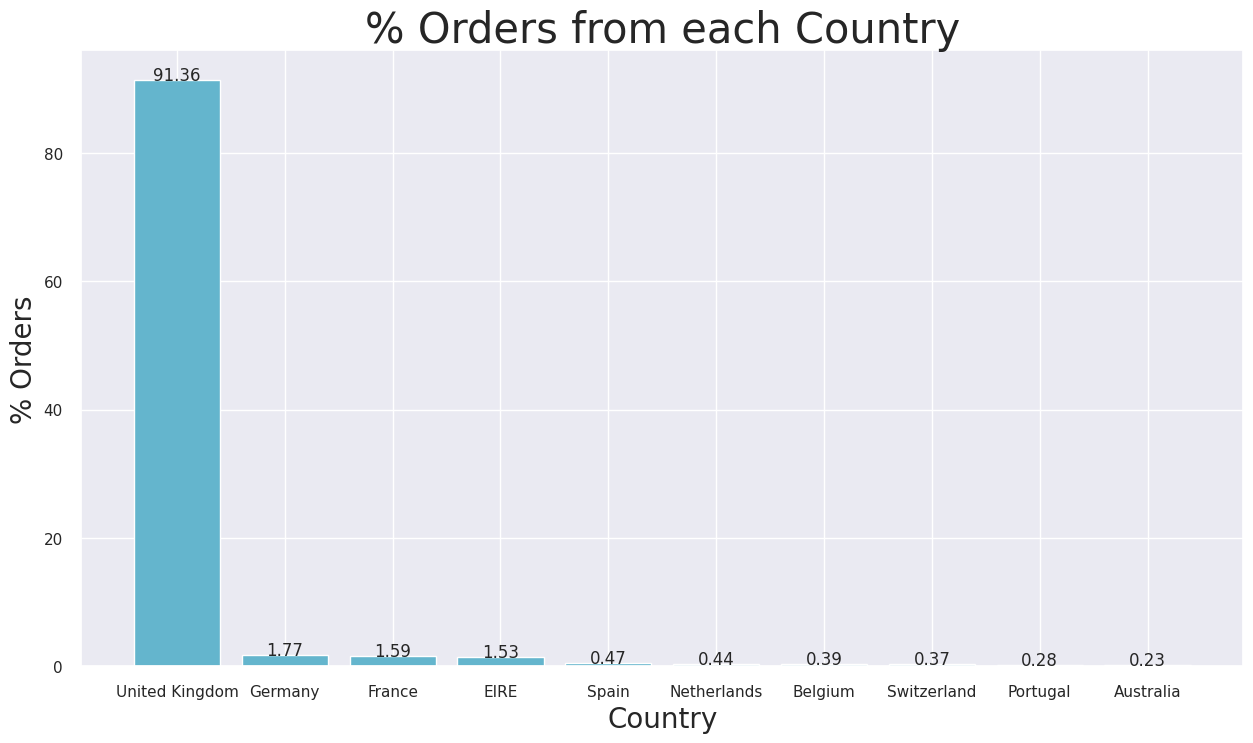

In [102]:
# Figure Size
plt.figure(figsize=(15,8))

## Define x and y axis
x=Top_ten_countries['Country']
y=Top_ten_countries['Country_percent']

# creating the bar plot
plt.bar(x,y,color ='c')

## Function to set label
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i],ha="center")

addlabels(x,round(y,2))

# set xlabel. ylabel and title
plt.xlabel("Country", size=20)
plt.ylabel("% Orders", size=20)
plt.title("% Orders from each Country", size=30)

## Showing the plot
plt.show()

**Checking for cancelled orders**

Lets look at the number of cancelled orders in the dataset.

In [103]:
# String to be searched in start of string
search ="C"

# boolean series returned with False at place of NaN
bool_series = df["InvoiceNo"].str.startswith(search, na=False)

# displaying filtered dataframe
cancelled_orders = df[bool_series]

cancelled_orders.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom


In [104]:
cancelled_orders.shape

(9251, 8)

In [105]:
cancelled_orders_percentage = cancelled_orders['InvoiceNo'].count()*100/df['InvoiceNo'].count()
cancelled_orders_percentage

1.7238712658928408

This shows that 9251 (approx 1.72%) were such orders which was cancelled.

In [106]:
cancelled_orders_country = cancelled_orders.groupby('Country')['InvoiceNo'].count().reset_index()

In [107]:
cancelled_orders_countries_top10 = cancelled_orders_country.sort_values('InvoiceNo',ascending=False, ignore_index=True).head(10)
cancelled_orders_countries_top10

,Country,InvoiceNo
0,United Kingdom,7821
1,Germany,453
2,EIRE,301
3,France,148
4,USA,112
5,Australia,74
6,Spain,48
7,Italy,45
8,Belgium,38
9,Japan,37


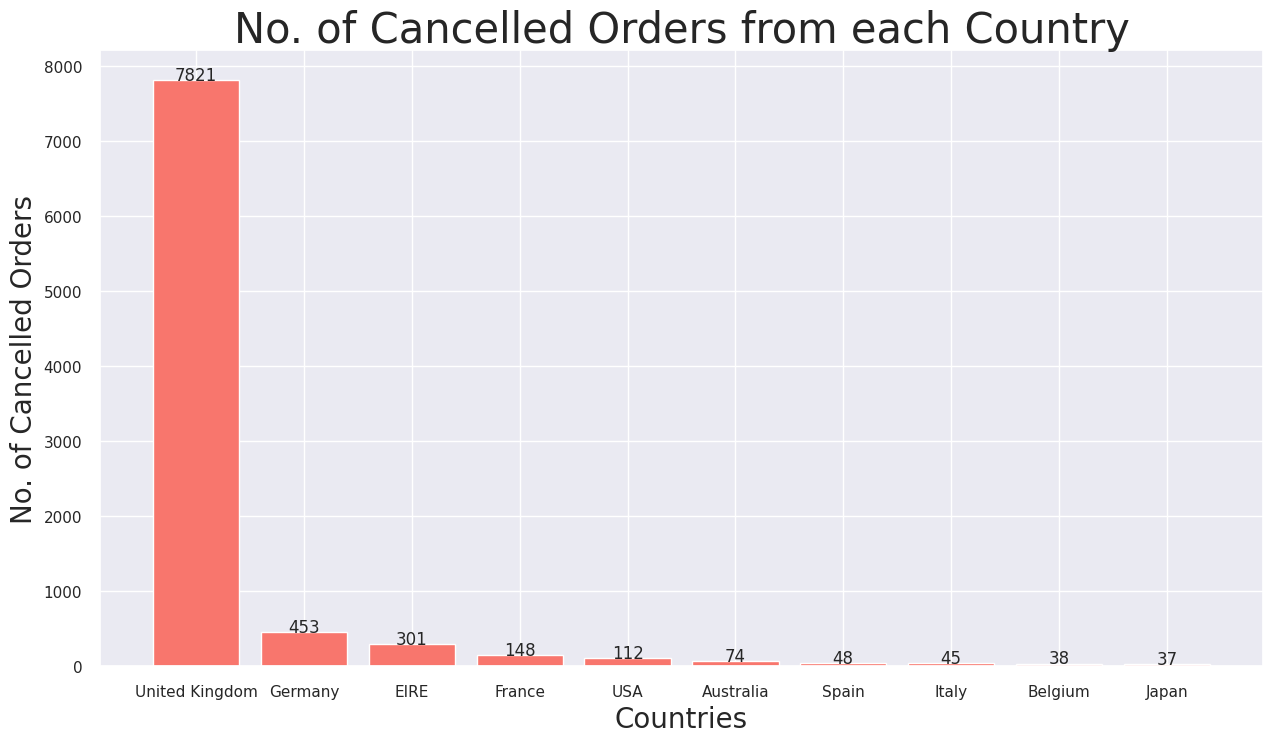

In [108]:
# Figure Size
plt.figure(figsize=(15,8))

## Define x and y axis
x=cancelled_orders_countries_top10['Country']
y=cancelled_orders_countries_top10['InvoiceNo']

# creating the bar plot
plt.bar(x,y,color = '#F8766D')

## Function to set label
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i],ha = "center")

addlabels(x,y)

# set xlabel. ylabel and title
plt.xlabel("Countries", size=20)
plt.ylabel("No. of Cancelled Orders", size=20)
plt.title("No. of Cancelled Orders from each Country", size=30)

## Showing the plot
plt.show()

In [109]:
df = df[~df.InvoiceNo.str.contains("C", na=False)]

In [110]:
# shape of dataset without cancelled orders
df.shape

(527390, 8)

**Customer's data**

In [111]:
# defining new dataset for customer
cust_df = df.copy()

In [112]:
# creating new column amount
cust_df['amount'] = cust_df.Quantity*cust_df.UnitPrice

In [113]:
cust_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [114]:
# total sales per customer
Sales_sum = cust_df.groupby(["CustomerID"]).amount.sum().sort_values(ascending = False).iloc[:20].reset_index()
Sales_sum.head(10)

,CustomerID,amount
0,14646.0,280206.02
1,18102.0,259657.30
2,17450.0,194390.79
3,16446.0,168472.50
4,14911.0,143711.17
5,12415.0,124914.53
6,14156.0,117210.08
7,17511.0,91062.38
8,16029.0,80850.84
9,12346.0,77183.60


<Axes: xlabel='CustomerID', ylabel='amount'>

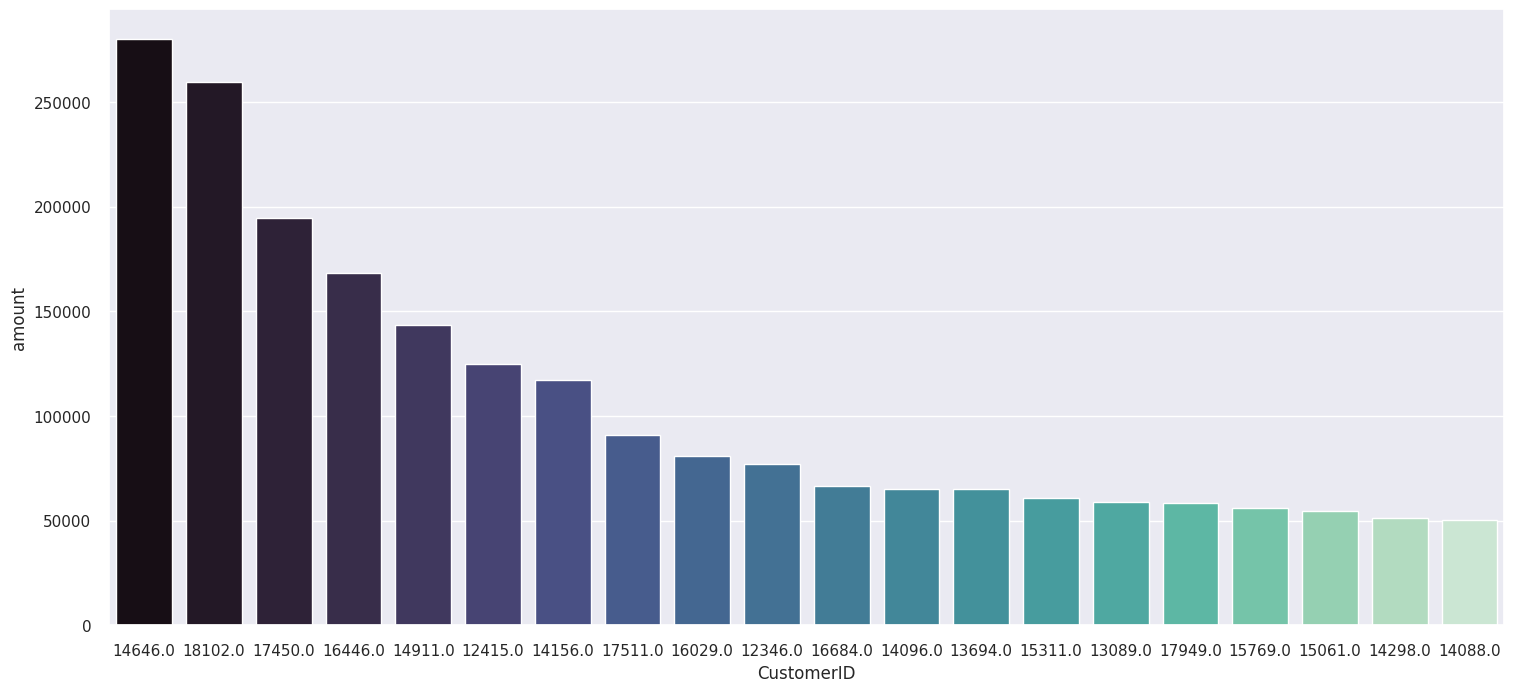

In [115]:
sns.set(rc={'figure.figsize':(18,8)})
sns.barplot(x="CustomerID", y="amount", data=Sales_sum, order=Sales_sum['CustomerID'], palette = "mako")

**Top products**

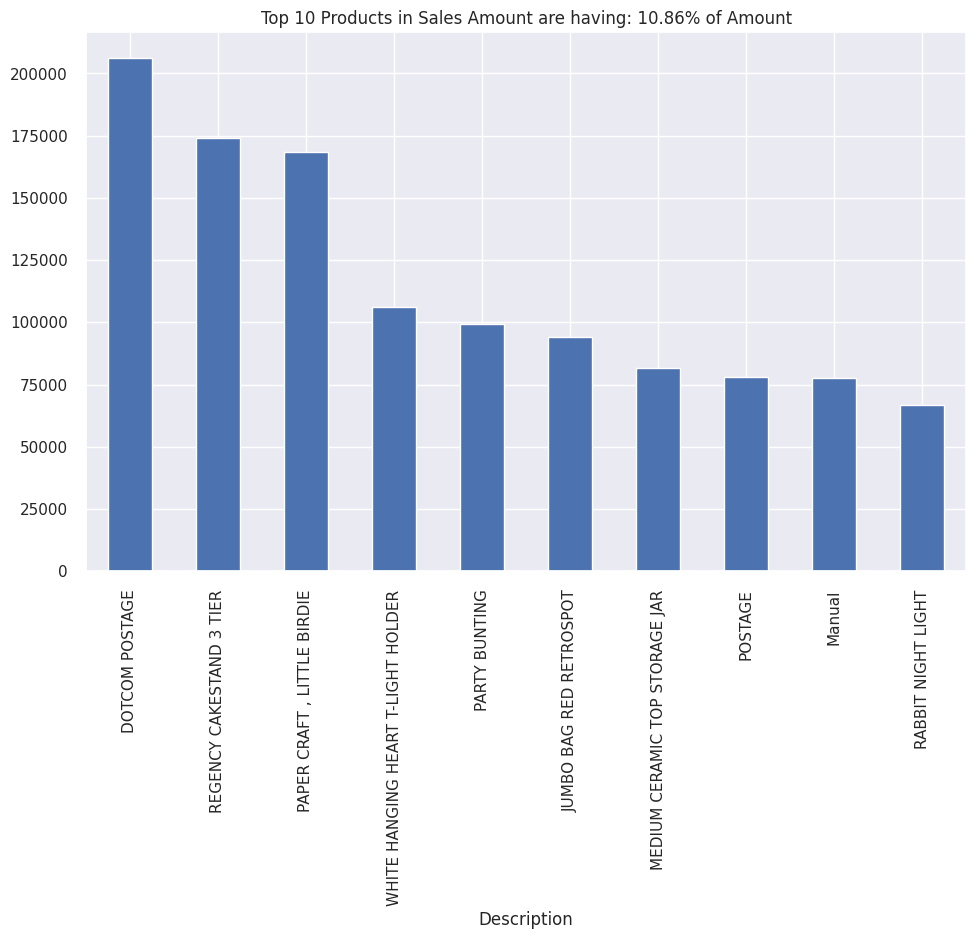

In [116]:
AmoutSum = cust_df.groupby(["Description"]).amount.sum().sort_values(ascending = False)
inv = cust_df[["Description", "InvoiceNo"]].groupby(["Description"]).InvoiceNo.unique().\
      agg(np.size).sort_values(ascending = False)

fig = plt.figure(figsize=(25, 7))
f1 = fig.add_subplot(121)
Top10 = list(AmoutSum[:10].index)
PercentSales =  np.round((AmoutSum[Top10].sum()/AmoutSum.sum()) * 100, 2)

g = AmoutSum[Top10].\
    plot(kind='bar', title='Top 10 Products in Sales Amount are having: {:3.2f}% of Amount'.\
                       format(PercentSales))

**Checking orders with negative quantities that were not cancelled**

In [117]:
df_negative_qty = df[df['Quantity'] < 0]
df_negative_qty.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
2406,536589,21777,NaN,-10,2010-12-01 16:50:00,0.0,NaN,United Kingdom
4347,536764,84952C,NaN,-38,2010-12-02 14:42:00,0.0,NaN,United Kingdom
7188,536996,22712,NaN,-20,2010-12-03 15:30:00,0.0,NaN,United Kingdom
7189,536997,22028,NaN,-20,2010-12-03 15:30:00,0.0,NaN,United Kingdom
7190,536998,85067,NaN,-6,2010-12-03 15:30:00,0.0,NaN,United Kingdom


As we can see from the above, these cases are the ones where CustomerID values are NaNs. These cases were also removed from the data.

In [118]:
# checking the shape
df_negative_qty.shape

(1336, 8)

So, there are 1336 rows having negative quantity and also orders were not canceled.

Also we can see that, these cases are the ones where CustomerID values are NaNs. These cases should be removed from the data.

In [119]:
# defining dataset without negative quantities
df = df[df['Quantity'] > 0]

In [120]:
# checking its shape...
df.shape

(526054, 8)

In [121]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description       592
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     133322
Country             0
dtype: int64

Customer ID has 133322 Null Values. And Description has 592 Nan Values.Decided to drop the Null values to make the data more cleaned.

In [122]:
# dropping null values
df.dropna(inplace=True)

In [123]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [124]:
# checking shape after removing null values
df.shape

(392732, 8)

In [125]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [126]:
# describing the dataset
df.iloc[:, :-1].describe().T.sort_values(by='std' , ascending = False)\
                     .style.background_gradient(cmap='Greens')\
                     .bar(subset=["max"], color='#F8766D')\
                     .bar(subset=["mean",], color='#00BFC4')

,count,mean,std,min,25%,50%,75%,max
CustomerID,392732.000000,15287.734822,1713.567773,12346.000000,13955.000000,15150.000000,16791.000000,18287.000000
Quantity,392732.000000,13.153718,181.588420,1.000000,2.000000,6.000000,12.000000,80995.000000
UnitPrice,392732.000000,3.125596,22.240725,0.000000,1.250000,1.950000,3.750000,8142.750000


# **Feature Engineering &  Data Preprocessing** - **RFM model (Recency, Frequency, Monetary value)**

**Recency**

To create a Recency feature variable, i need to decide the reference date for analysis and i wil define the reference date as one day before the last transaction.

In [127]:
reference_date = df.InvoiceDate.max()

#timedelta function returns to total number of seconds
reference_date = reference_date + datetime.timedelta(days=1)

print(df.InvoiceDate.max(), df.InvoiceDate.min())
reference_date

2011-12-09 12:50:00 2010-12-01 08:26:00


Timestamp('2011-12-10 12:50:00')

i will construct a reference variable as number of days before the reference date when a customer last made a purchase.

In [128]:
df['days_since_last_purchase'] = reference_date- df.InvoiceDate
df['days_since_last_purchase_num'] = df['days_since_last_purchase'].astype('timedelta64[D]')
df['days_since_last_purchase_num'].head()

0    374.0
1    374.0
2    374.0
3    374.0
4    374.0
Name: days_since_last_purchase_num, dtype: float64

In [129]:
customer_history_df = df.groupby('CustomerID')['days_since_last_purchase_num'].min().reset_index()
customer_history_df.rename(columns={'days_since_last_purchase_num':'Recency'}, inplace=True)
customer_history_df.head()

,CustomerID,Recency
0,12346.0,326.0
1,12347.0,2.0
2,12348.0,75.0
3,12349.0,19.0
4,12350.0,310.0


In [130]:
customer_history_df.iloc[:, :].describe().T.sort_values(by='std' , ascending = False)\
                     .style.background_gradient(cmap='Greens')\
                     .bar(subset=["max"], color='#F8766D')\
                     .bar(subset=["mean",], color='#00BFC4')

,count,mean,std,min,25%,50%,75%,max
CustomerID,4339.000000,15299.936852,1721.889758,12346.000000,13812.500000,15299.000000,16778.500000,18287.000000
Recency,4339.000000,92.518322,100.009747,1.000000,18.000000,51.000000,142.000000,374.000000


**Frequency and Monetary value**

In [131]:
# calculating monetary
df['Monetary'] = df['Quantity']*df['UnitPrice']

In [132]:
customer_monetary_val = df[['CustomerID','Monetary']].groupby('CustomerID').sum().reset_index()
customer_monetary_val.head()

,CustomerID,Monetary
0,12346.0,77183.60
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


In [133]:
customer_history_df=customer_history_df.merge(customer_monetary_val,how='outer')
customer_history_df.head()

,CustomerID,Recency,Monetary
0,12346.0,326.0,77183.60
1,12347.0,2.0,4310.00
2,12348.0,75.0,1797.24
3,12349.0,19.0,1757.55
4,12350.0,310.0,334.40


In [134]:
# calculating customer frequency
customer_freq = df[['CustomerID','Monetary']].groupby('CustomerID').count().reset_index()
customer_freq.rename(columns={'Monetary':'Frequency'},inplace=True)
customer_freq.head()

,CustomerID,Frequency
0,12346.0,1
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17


In [135]:
customer_history_df=customer_history_df.merge(customer_freq,how='outer')
customer_history_df.head()

,CustomerID,Recency,Monetary,Frequency
0,12346.0,326.0,77183.60,1
1,12347.0,2.0,4310.00,182
2,12348.0,75.0,1797.24,31
3,12349.0,19.0,1757.55,73
4,12350.0,310.0,334.40,17


In [136]:
customer_history_df.Monetary[customer_history_df.Monetary<=0].count()

1

In [137]:
customer_history_df = customer_history_df[customer_history_df.Monetary != 0]

**Outlier Treatment**

Text(0.5, 0, 'Attribute - Recency')

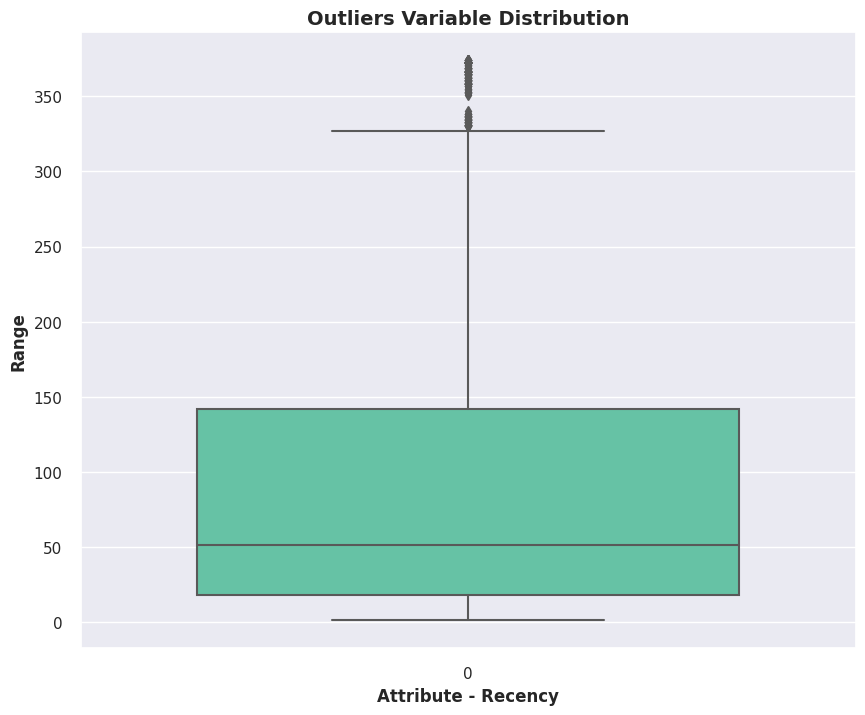

In [138]:
# Box plot of Recency
plt.rcParams['figure.figsize'] = [10,8]
sns.boxplot(data = customer_history_df['Recency'], orient="v", palette="Set2" ,whis=1.5,saturation=1, width=0.7)
plt.title("Outliers Variable Distribution", fontsize = 14, fontweight = 'bold')
plt.ylabel("Range", fontweight = 'bold')
plt.xlabel("Attribute - Recency", fontweight = 'bold')

Text(0.5, 0, 'Attribute - Monetary')

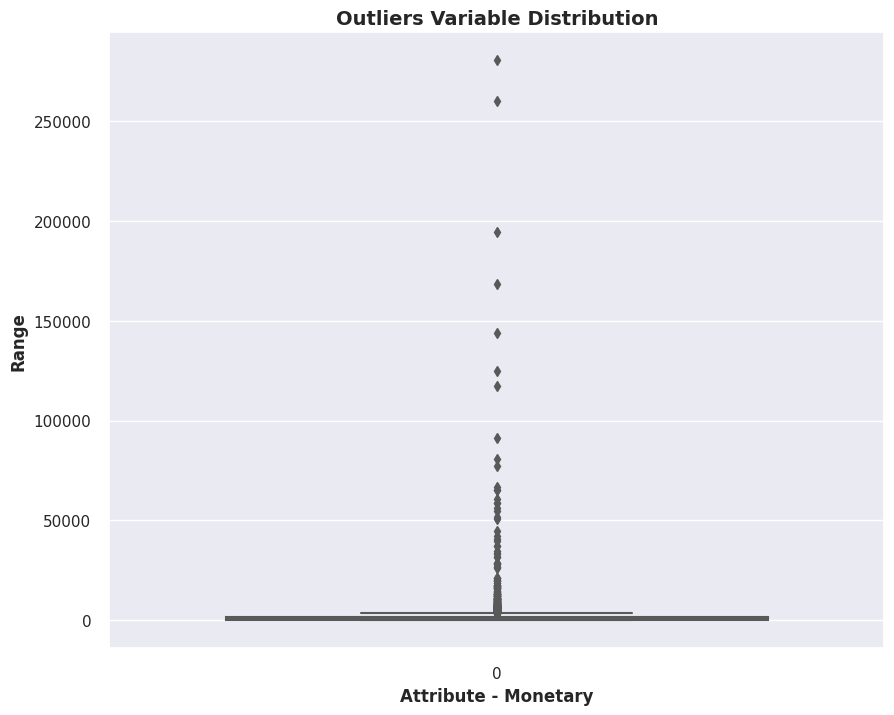

In [139]:
# Box plot of Monetary
plt.rcParams['figure.figsize'] = [10,8]
sns.boxplot(data = customer_history_df['Monetary'], orient="v", palette="Set2" ,whis=1.5,saturation=1, width=0.7)
plt.title("Outliers Variable Distribution", fontsize = 14, fontweight = 'bold')
plt.ylabel("Range", fontweight = 'bold')
plt.xlabel("Attribute - Monetary", fontweight = 'bold')

Text(0.5, 0, 'Attribute - Frequency')

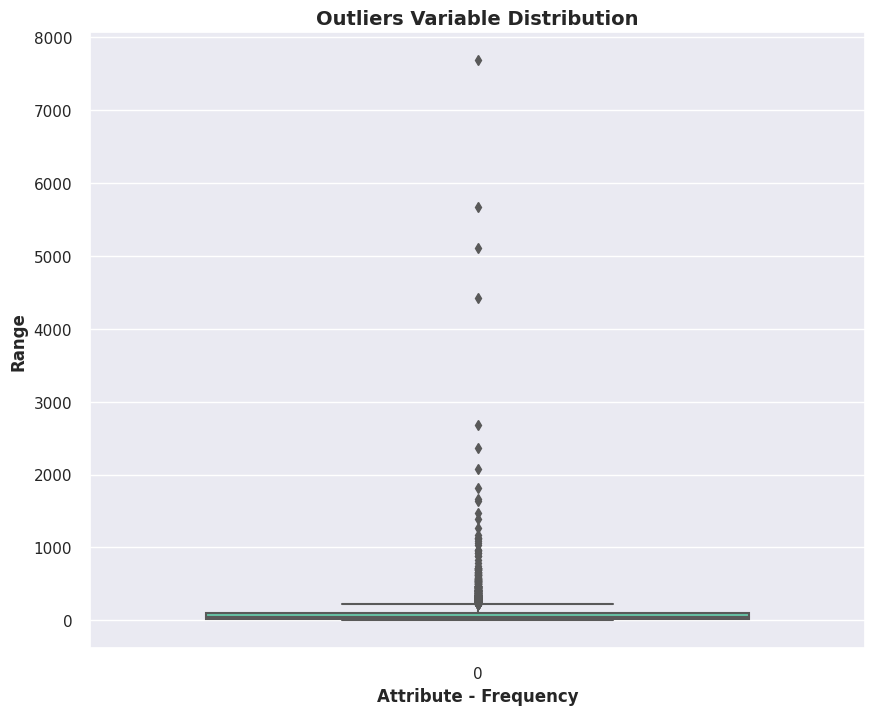

In [140]:
# Box plot of Frequency
plt.rcParams['figure.figsize'] = [10,8]
sns.boxplot(data = customer_history_df['Frequency'], orient="v", palette="Set2" ,whis=1.5,saturation=1, width=0.7)
plt.title("Outliers Variable Distribution", fontsize = 14, fontweight = 'bold')
plt.ylabel("Range", fontweight = 'bold')
plt.xlabel("Attribute - Frequency", fontweight = 'bold')

In [141]:
# removing (statistical) outliers
Q1 = customer_history_df.Monetary.quantile(0.05)
Q3 = customer_history_df.Monetary.quantile(0.95)
IQR = Q3 - Q1
customer_history_df = customer_history_df[(customer_history_df.Monetary >= Q1 - 1.5*IQR) & (customer_history_df.Monetary <= Q3 + 1.5*IQR)]

# outlier treatment for recency
Q1 = customer_history_df.Recency.quantile(0.05)
Q3 = customer_history_df.Recency.quantile(0.95)
IQR = Q3 - Q1
customer_history_df = customer_history_df[(customer_history_df.Recency >= Q1 - 1.5*IQR) & (customer_history_df.Recency <= Q3 + 1.5*IQR)]

# outlier treatment for frequency
Q1 = customer_history_df.Frequency.quantile(0.05)
Q3 = customer_history_df.Frequency.quantile(0.95)
IQR = Q3 - Q1
customer_history_df = customer_history_df[(customer_history_df.Frequency >= Q1 - 1.5*IQR) & (customer_history_df.Frequency <= Q3 + 1.5*IQR)]


In [142]:
# Rescaling
rfm_df = customer_history_df[['Monetary', 'Frequency', 'Recency']]

# instantiate
scaler = StandardScaler()

# fit_transform
rfm_df_scaled = scaler.fit_transform(rfm_df)
rfm_df_scaled.shape

(4257, 3)

In [143]:
rfm_df_scaled = pd.DataFrame(rfm_df_scaled)
rfm_df_scaled.columns = ['Monetary', 'Frequency', 'Recency']
rfm_df_scaled.head()

,Monetary,Frequency,Recency
0,1.660278,1.082543,-0.917855
1,0.267299,-0.456480,-0.189261
2,0.245296,-0.028407,-0.748182
3,-0.543644,-0.599171,2.156212
4,0.660231,0.093899,-0.578510


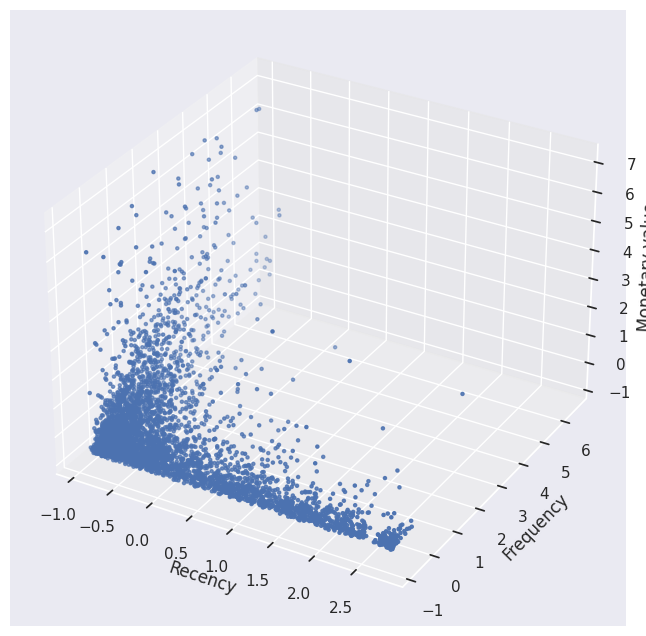

In [144]:
# Importing Library for 3D plot
from mpl_toolkits.mplot3d import Axes3D

# set fig size
fig=plt.figure(figsize=(10,8))

# syntax for 3-D plotting
ax=fig.add_subplot(111,projection='3d')

# syntax for plotting
xs = rfm_df_scaled.Recency
ys = rfm_df_scaled.Frequency
zs = rfm_df_scaled.Monetary
ax.scatter(xs,ys,zs,s=5)

# set x, y & z label
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary value')

# show the plot
plt.show()

**Model Training**

**Silhouette analysis on K-Means Clustering**

Silhouette analysis can be used to study the separation distance between the resulting clusters, as a strategy to quantifying the quality of clustering via graphical tool to plot a measure of how tightly grouped the samples in the clusters are. The silhouette plot displays a measure of how close each point in one cluster is to points in the neighboring clusters and thus provides a way to assess parameters like number of clusters visually.

Let's see below how our data perform for each K clusters groups (3, 5 and 7) in the silhouette score of each cluster, along with the center of each of the cluster discovered in the scatter plots, by amount_log vs recency_log and vs frequency_log.

Silhouette Analysis

silhouette score = (p-q)/max(p,q)

p is the mean distance to the points in the nearest cluster that the data point is not a part of

q is the mean intra-cluster distance to all the points in its own cluster.

The value of the silhouette score range lies between -1 to 1.

A score closer to 1 indicates that the data point is very similar to other data points in the cluster,

A score closer to -1 indicates that the data point is not similar to the data points in its cluster.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


SilhouetteVisualizer(ax=<Axes: >, estimator=KMeans(n_clusters=3))

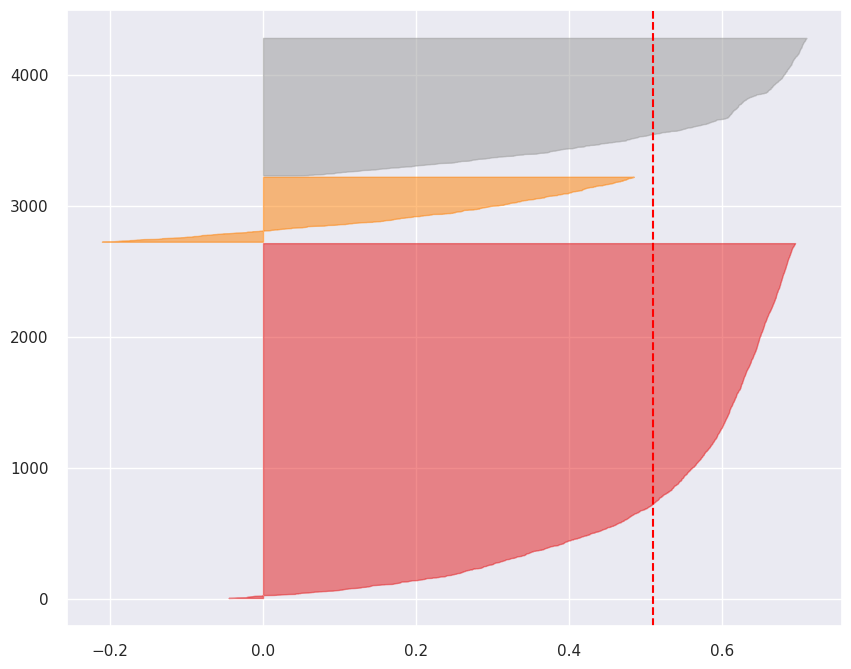

In [145]:
# applying with 3 clusters
model = SilhouetteVisualizer(KMeans(3))
model.fit(rfm_df_scaled) # fitting the model

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


SilhouetteVisualizer(ax=<Axes: >, estimator=KMeans(n_clusters=4))

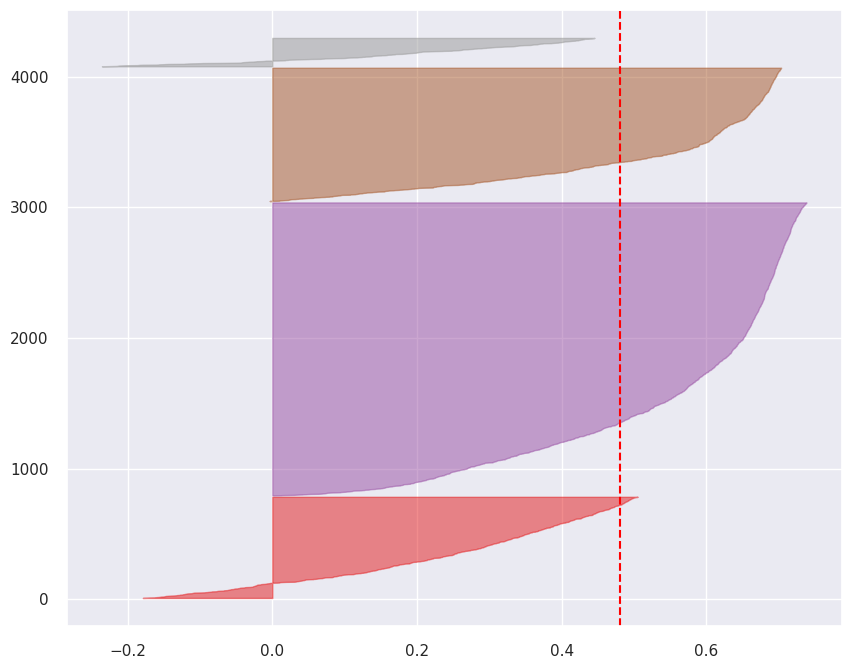

In [146]:
# applying with 4 clusters
model = SilhouetteVisualizer(KMeans(4))
model.fit(rfm_df_scaled) # fitting

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


SilhouetteVisualizer(ax=<Axes: >, estimator=KMeans(n_clusters=5))

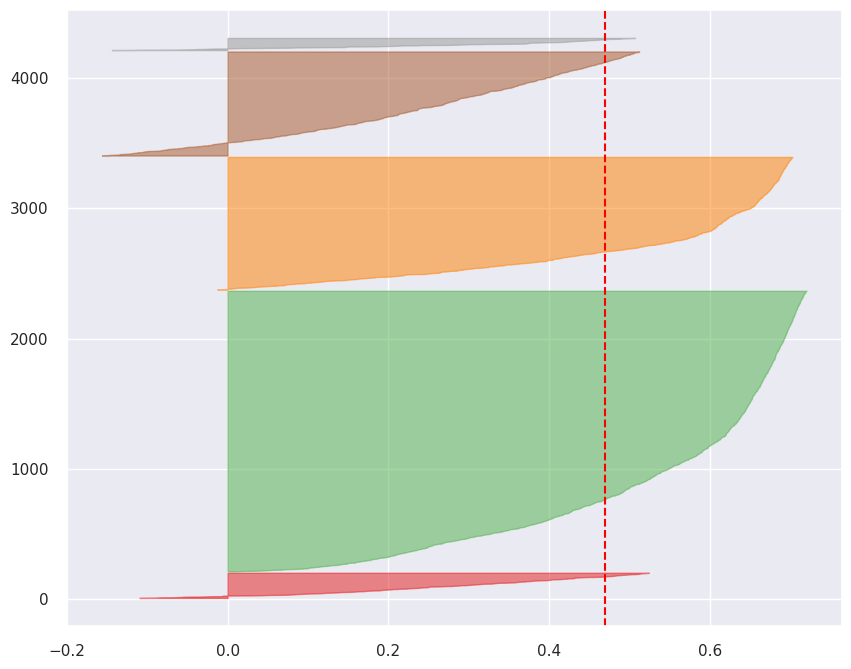

In [147]:
# applying with 5 clusters
model = SilhouetteVisualizer(KMeans(5))
model.fit(rfm_df_scaled) # fitting

**Finding best value for k**

**The Elbow Method** - Using the elbow method to find the optimal number of clusters. The idea behind the elbow method is to identify the value of k where the distortion begins to increase most rapidly. If k increases, the distortion will decrease, because the samples will be closer to the centroids they are assigned to.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

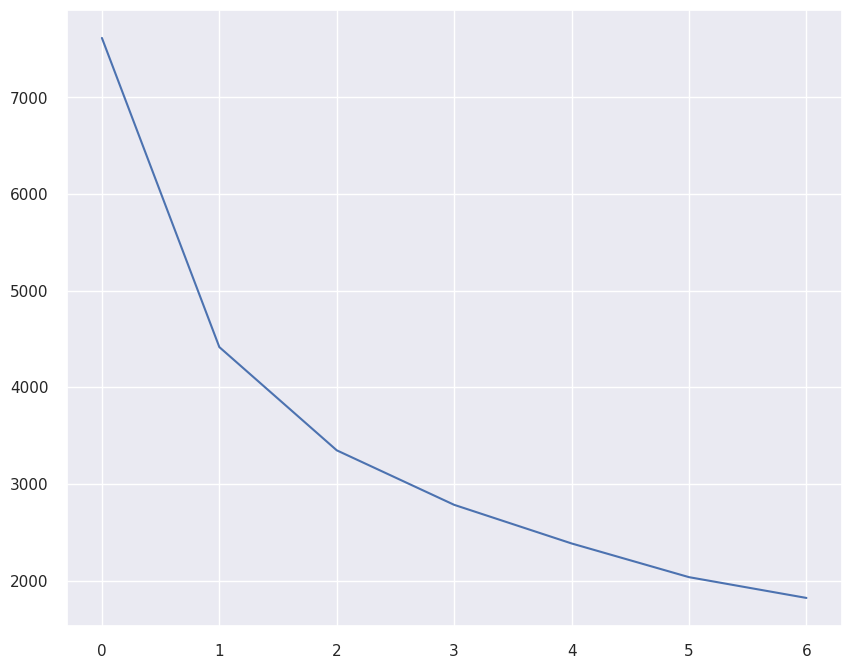

In [148]:
# elbow-curve/SSD
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(rfm_df_scaled)

    ssd.append(kmeans.inertia_)

# plot the SSDs for each n_clusters
# ssd
plt.plot(ssd)

In [149]:
# silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:

    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(rfm_df_scaled)

    cluster_labels = kmeans.labels_

    # silhouette score
    silhouette_avg = silhouette_score(rfm_df_scaled, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters=2, the silhouette score is 0.5422023424541372


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters=3, the silhouette score is 0.5098063691972851


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters=4, the silhouette score is 0.4802289203994552


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters=5, the silhouette score is 0.4690572313146714


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters=6, the silhouette score is 0.41737783272425666


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters=7, the silhouette score is 0.41580878197228344


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters=8, the silhouette score is 0.4078931176446424


In [150]:
# final model with k=3
kmeans = KMeans(n_clusters=3, max_iter=50)
kmeans.fit(rfm_df_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(max_iter=50, n_clusters=3)

In [151]:
kmeans.labels_

array([2, 0, 0, ..., 0, 2, 0], dtype=int32)

In [152]:
# assign the label
customer_history_df['cluster_id'] = kmeans.labels_
customer_history_df.head()

,CustomerID,Recency,Monetary,Frequency,cluster_id
1,12347.0,2.0,4310.00,182,2
2,12348.0,75.0,1797.24,31,0
3,12349.0,19.0,1757.55,73,0
4,12350.0,310.0,334.40,17,1
5,12352.0,36.0,2506.04,85,0


<Axes: xlabel='cluster_id', ylabel='Recency'>

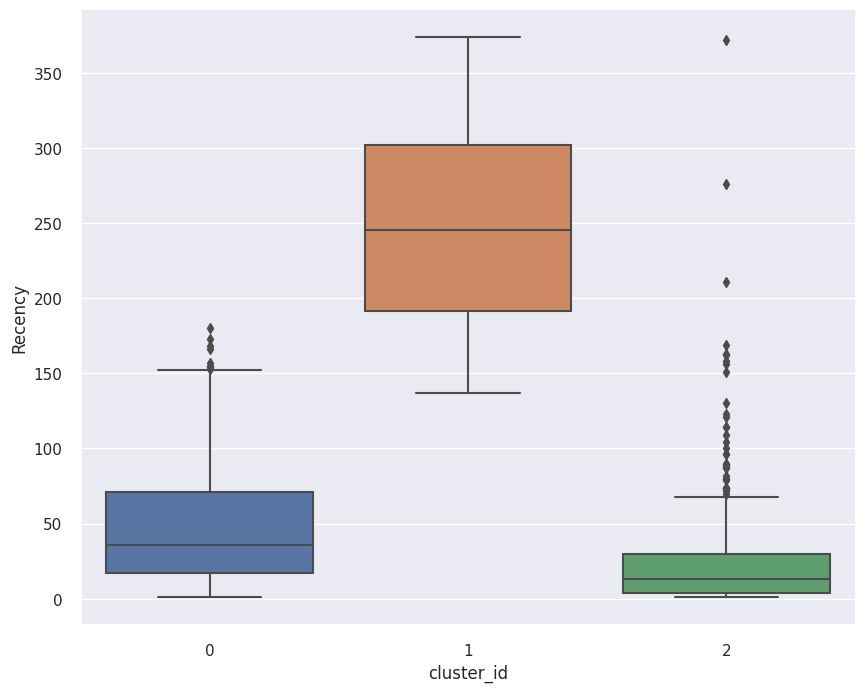

In [153]:
# plot
sns.boxplot(x='cluster_id', y='Recency', data=customer_history_df)

<Axes: xlabel='cluster_id', ylabel='Monetary'>

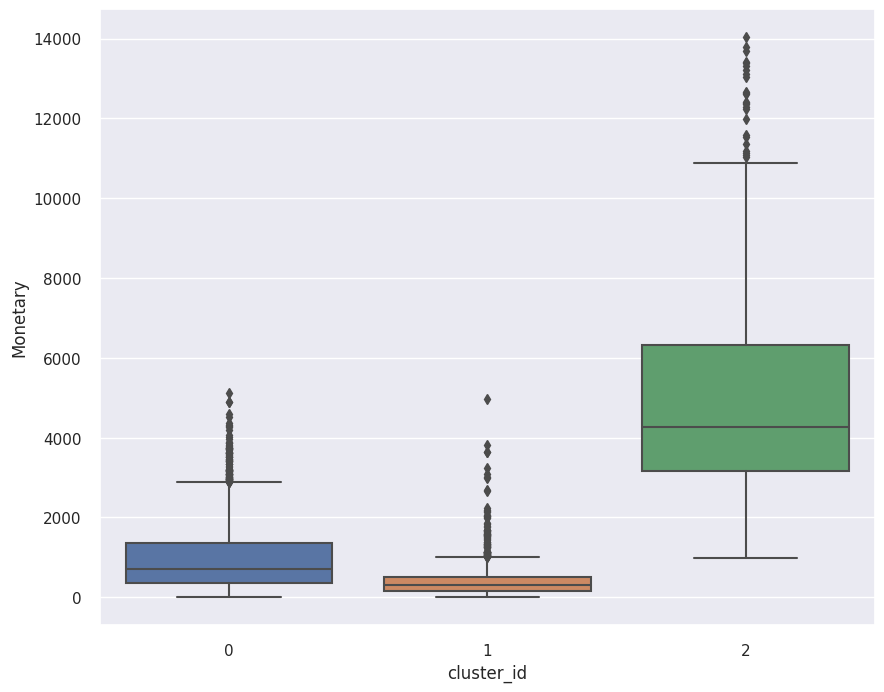

In [154]:
# plot
sns.boxplot(x='cluster_id', y='Monetary', data=customer_history_df)

<Axes: xlabel='cluster_id', ylabel='Frequency'>

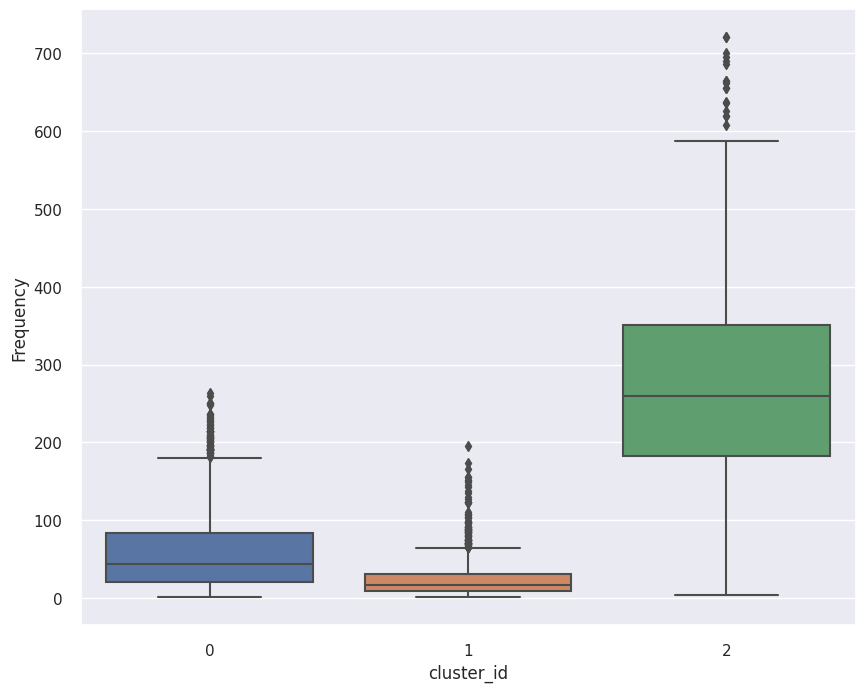

In [155]:
# plot
sns.boxplot(x='cluster_id', y='Frequency', data=customer_history_df)

**Hierarchical Clustering**

In [156]:
rfm_df_scaled.head()

,Monetary,Frequency,Recency
0,1.660278,1.082543,-0.917855
1,0.267299,-0.456480,-0.189261
2,0.245296,-0.028407,-0.748182
3,-0.543644,-0.599171,2.156212
4,0.660231,0.093899,-0.578510


In [157]:
customer_history_df.head()

,CustomerID,Recency,Monetary,Frequency,cluster_id
1,12347.0,2.0,4310.00,182,2
2,12348.0,75.0,1797.24,31,0
3,12349.0,19.0,1757.55,73,0
4,12350.0,310.0,334.40,17,1
5,12352.0,36.0,2506.04,85,0


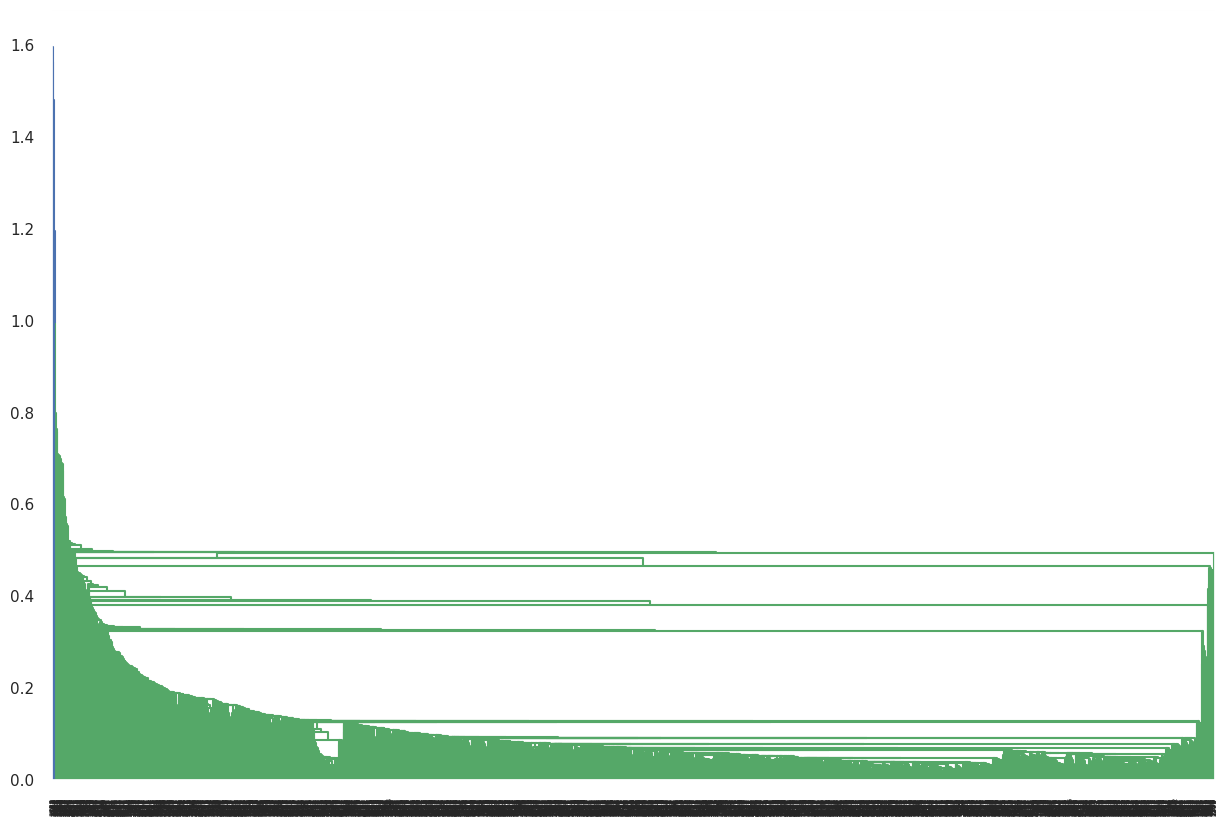

In [166]:
# single linkage
plt.figure(figsize=(15,10))
mergings = linkage(rfm_df_scaled, method="single", metric='euclidean')
dendrogram(mergings)
plt.show()

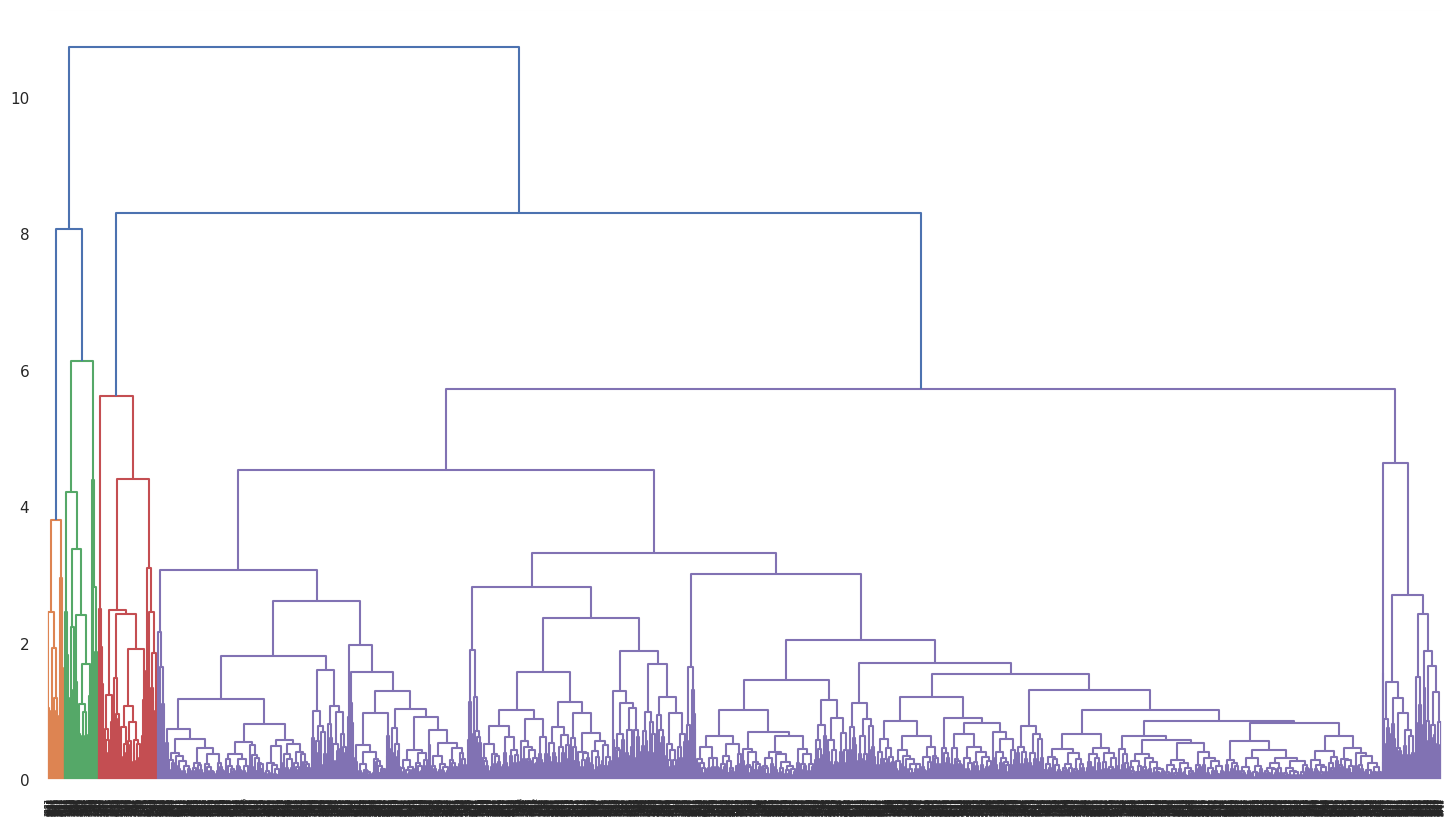

In [167]:
# complete linkage
plt.figure(figsize=(18,10))
mergings = linkage(rfm_df_scaled, method="complete", metric='euclidean')
dendrogram(mergings)
plt.show()

In [171]:
# 3 clusters
cluster_labels = cut_tree(mergings, n_clusters=3).reshape(-1, )
cluster_labels

array([0, 1, 1, ..., 1, 2, 1])

In [172]:
# assign cluster labels
customer_history_df['cluster_labels'] = cluster_labels
customer_history_df.head()

,CustomerID,Recency,Monetary,Frequency,cluster_id,cluster_labels
1,12347.0,2.0,4310.00,182,2,0
2,12348.0,75.0,1797.24,31,0,1
3,12349.0,19.0,1757.55,73,0,1
4,12350.0,310.0,334.40,17,1,1
5,12352.0,36.0,2506.04,85,0,1


<Axes: xlabel='cluster_labels', ylabel='Recency'>

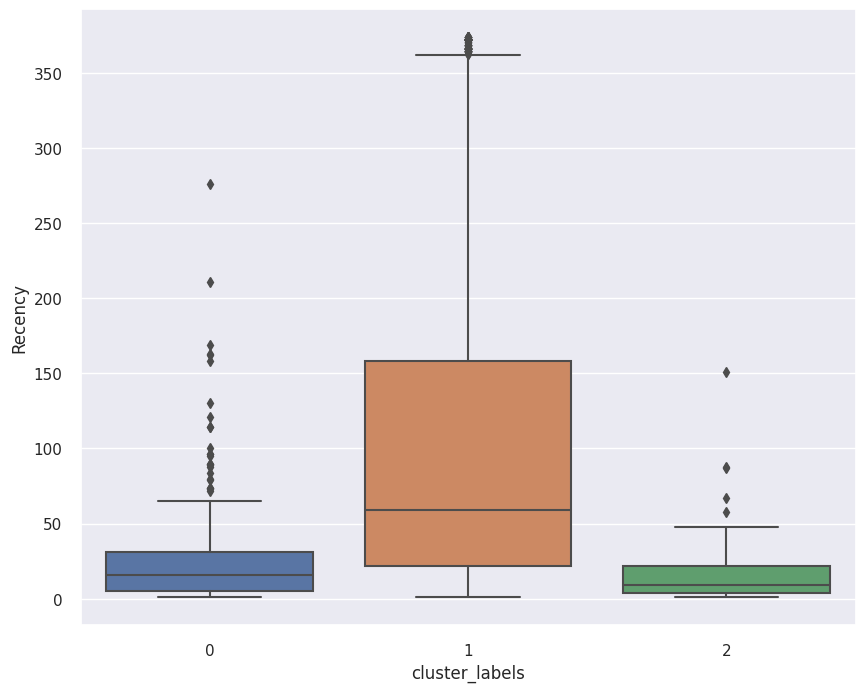

In [173]:
# plots
sns.boxplot(x='cluster_labels', y='Recency', data=customer_history_df)

<Axes: xlabel='cluster_labels', ylabel='Monetary'>

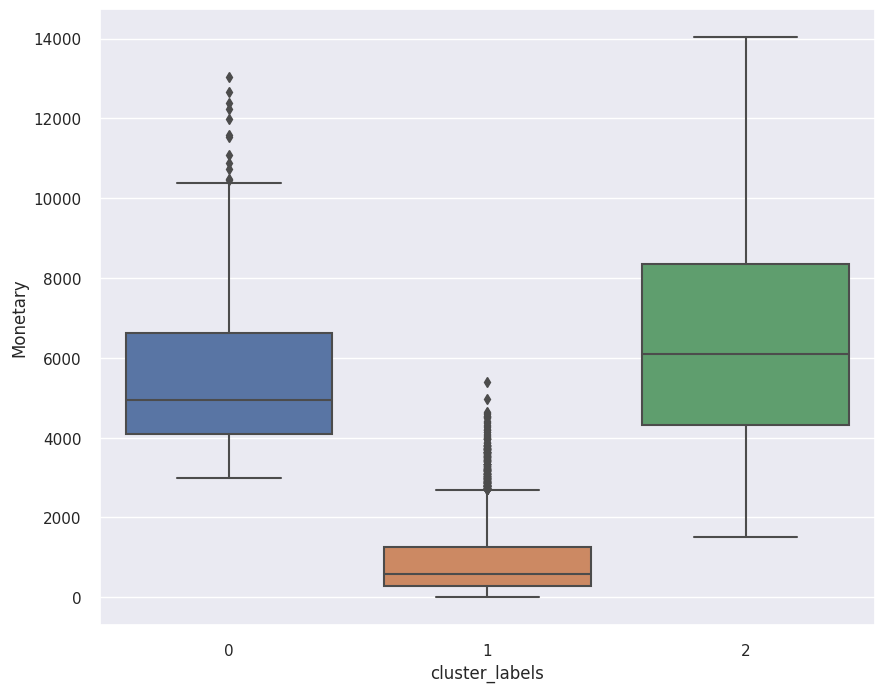

In [174]:
# plots
sns.boxplot(x='cluster_labels', y='Monetary', data=customer_history_df)

<Axes: xlabel='cluster_labels', ylabel='Frequency'>

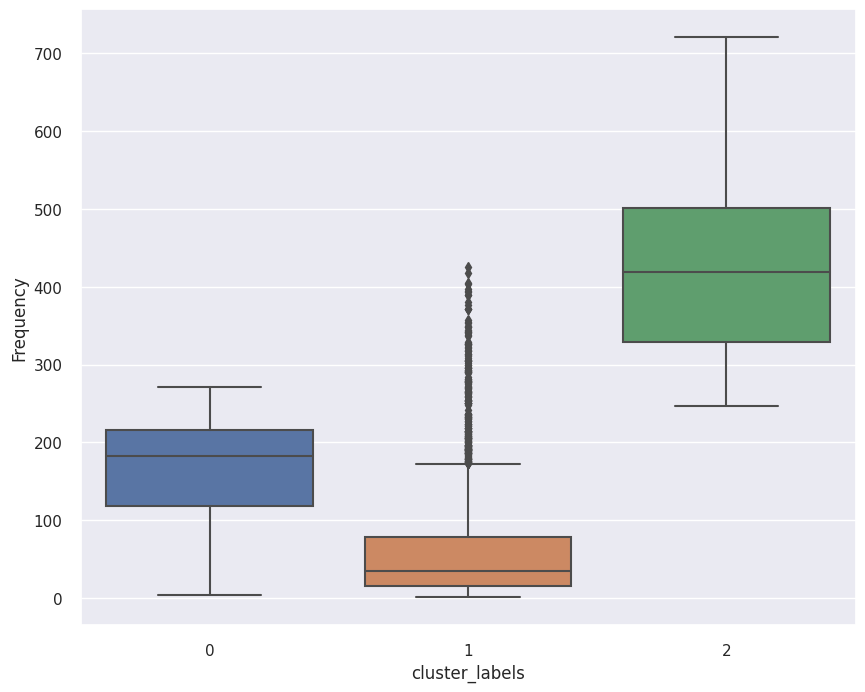

In [175]:
# plots
sns.boxplot(x='cluster_labels', y='Frequency', data=customer_history_df)

We can obeserved that cluster 2 have a highest sales frequency then to other clusters.

In [176]:
### visualize the result
import plotly.express as px
fig = px.scatter_3d(customer_history_df, x='Recency', y='Frequency', z='Monetary',
              color='cluster_labels')
fig.show()

**Summary**

RFM analysis can segment customers into homogenous group quickly with set of minimum variables. Scoring system can be defined and ranged differently. We get a better result for clustering steps by applying scoring rather than using the raw calculated RFM values. Therefore, segmenting should be done by RFM scoring and further analysis on the spending behavior should be done on the raw values for the targeted cluster to expose more insight and characteristics. RFM analysis solely depends on purchasing behavior and histories, analysis can be further improved by exploring weighted composite scoring or including customer demographic information and product information. A good analysis can increase effectiveness and efficiency of marketing plans, hence increase profitability at minimum cost.

# **Conclusion**

To conclude, we saw how we can segment our customer depending on our business requirements. You can perform RFM for your entire customer base, or just a subset. For example, you may first segment customers based on a geographical area or other demographics, and then by RFM for historical, transaction-based behaviour segments. RFM analysis can help in answering many questions with respect to their customers and this can help companies to make marketing strategies for their customers, retaining their slipping customers and providing recommendations to their customer based on their interest. We used the K-means algorithm to segment our customer in various clusters having similar similarity. I think K-means did a pretty good job here.